In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
import seaborn as sns

from RegressionFunc import *

### Объединение данных за все года + усреднение до суток

In [2]:
df = pd.read_csv('../data/gfs_days.csv', sep = ';', index_col = 'Date', parse_dates = ['Date'])

# Температурные инверсии
df['DT1'] = df['TMP_mb_1000'] - df['TMP_mb_925']
df['DT2'] = df['TMP_mb_925'] - df['TMP_mb_850']
df['DT3'] = df['TMP_mb_1000'] - df['TMP_mb_850']

In [3]:
X = df.values

### Стандартизация признаков

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

### Вычисление ковариационной матрицы, а также собственных векторов и собственных значений

In [5]:
cov_mat = np.cov(X_std.T)

In [6]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

### Кумулятивная сумма объясненных дисперсий

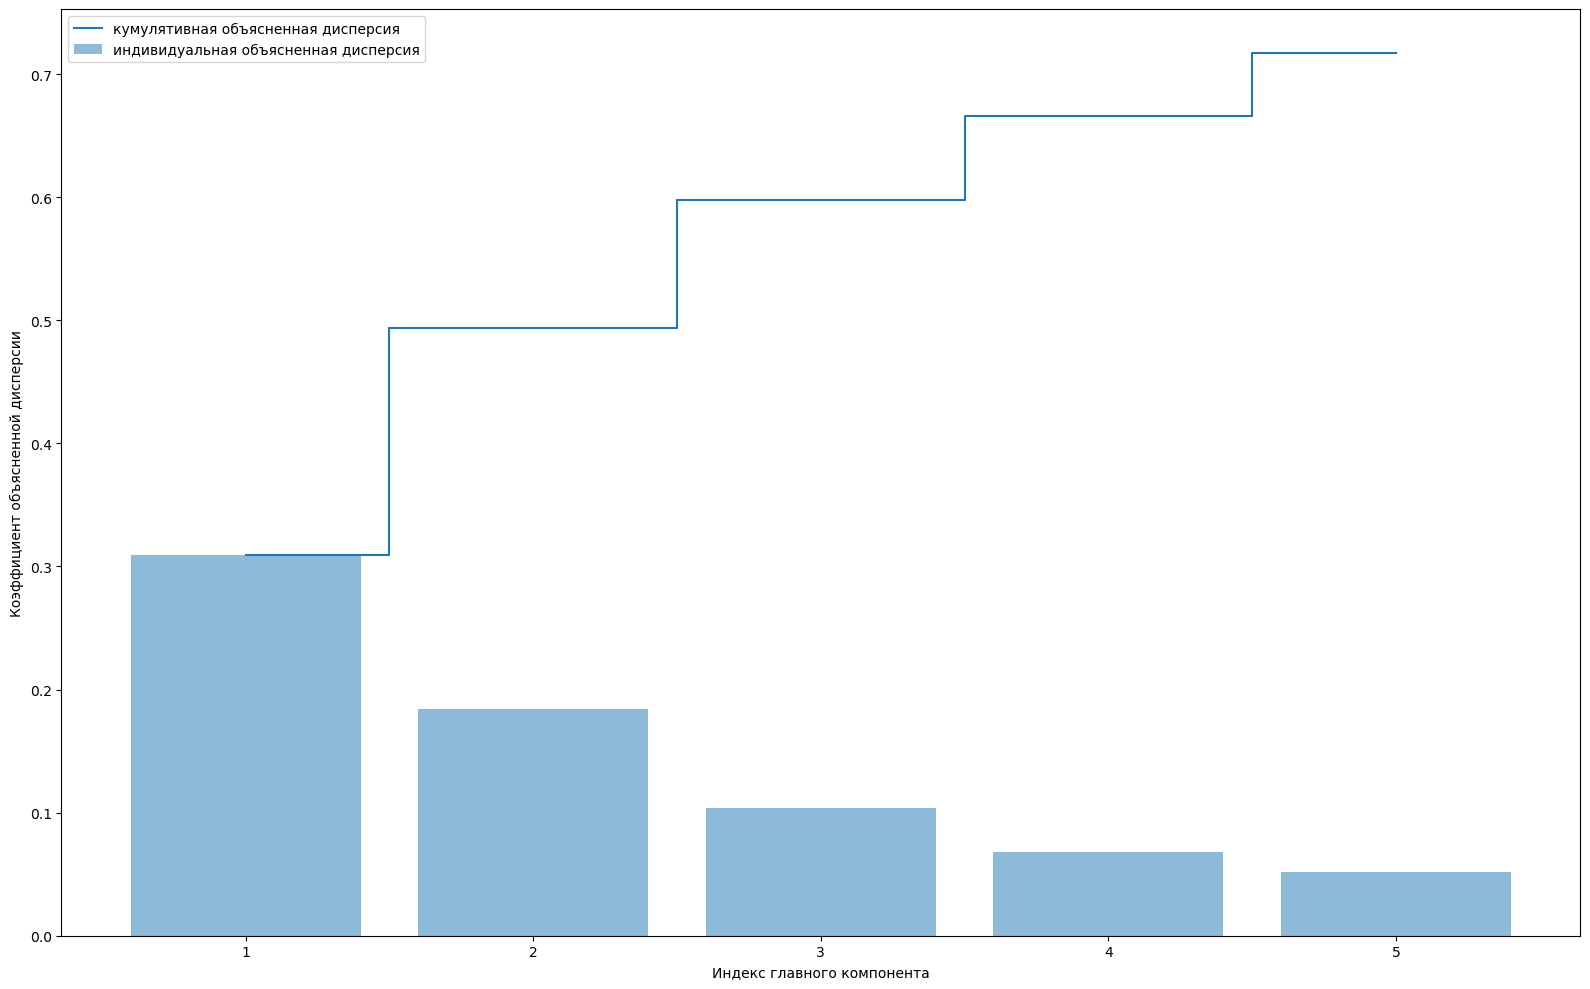

In [7]:
tot = sum(eigen_vals) # Сумма собственных значений
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)] # Доля объяснённой дисперсии
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize = (16, 10))
plt.bar(range(1,6), var_exp[:5], alpha = 0.5, align = 'center', label = 'индивидуальная объясненная дисперсия')
plt.step(range(1,6), cum_var_exp[:5], where ='mid', label = 'кумулятивная объясненная дисперсия')
plt.ylabel('Коэффициент объясненной дисперсии')
plt.xlabel('Индекс главного компонента')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show() 

In [8]:
# Определение числа главных компонент, объясняющих 80% дисперсии
def countPca(eig_vals):
    s = sum(eig_vals)
    tempS = 0
    k = 1
    for val in sorted(eig_vals, reverse = True):
        tempS += val
        print(f'{k}-я главная компонента объясняет {round(val/s*100, 2)}% дисперсии')
        if tempS / s >= 0.9:
            print(f'Первые {k} главных компонент объясняют {round(tempS / s * 100, 2)}% дисперсии')
            return k
        k += 1

In [9]:
k = countPca(eigen_vals)

1-я главная компонента объясняет 30.92% дисперсии
2-я главная компонента объясняет 18.42% дисперсии
3-я главная компонента объясняет 10.41% дисперсии
4-я главная компонента объясняет 6.82% дисперсии
5-я главная компонента объясняет 5.14% дисперсии
6-я главная компонента объясняет 3.75% дисперсии
7-я главная компонента объясняет 2.64% дисперсии
8-я главная компонента объясняет 2.09% дисперсии
9-я главная компонента объясняет 1.86% дисперсии
10-я главная компонента объясняет 1.69% дисперсии
11-я главная компонента объясняет 1.49% дисперсии
12-я главная компонента объясняет 1.33% дисперсии
13-я главная компонента объясняет 1.15% дисперсии
14-я главная компонента объясняет 1.04% дисперсии
15-я главная компонента объясняет 0.92% дисперсии
16-я главная компонента объясняет 0.82% дисперсии
Первые 16 главных компонент объясняют 90.49% дисперсии


### Сортировка собственных пар в порядке убывания собственных значений

In [11]:
# Cоздать список кортежей (собственное значение, собственный вектор)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Oтсортировать кортежи (собственное значение, собственный вектор) от высоких к низким
eigen_pairs.sort(key=lambda k: k[0], reverse = True) 
#eigen_pairs

### Соберем 8 собственных векторов, которые соответствуют 8 наибольшим собственным значениям, чтобы захватить около 80% дисперсии в наборе данных

In [12]:
w = np.hstack([eigen_pairs[i][1] [:, np.newaxis] for i in range(k)])

In [13]:
pd.DataFrame(w)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.110043,0.067084,-0.029403,-0.038398,0.044406,-0.041217,0.029377,-0.100963,0.043408,-0.012620,0.013694,-0.059433,-0.057554,-0.123222,0.013248,-0.083851
1,-0.018467,-0.014092,0.084001,0.039327,0.056104,0.040785,0.209023,-0.046853,0.052897,0.093744,0.024399,-0.182686,-0.097833,-0.054584,0.324208,0.068210
2,-0.019121,-0.016579,0.081207,0.040675,0.004580,0.028137,0.252141,-0.036925,0.052143,0.143023,0.020653,-0.219301,-0.113511,-0.031072,0.358331,0.102439
3,-0.019026,-0.009759,0.062849,0.033914,-0.036039,0.009176,0.264837,-0.006925,0.071921,0.225637,-0.022355,-0.206770,-0.115223,-0.002129,0.236100,0.174228
4,-0.001438,0.021104,0.053956,0.027717,-0.067355,0.004537,0.240636,0.045883,0.059501,0.289232,-0.049284,-0.112913,-0.061364,0.042883,0.039080,0.222522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.011111,0.012277,-0.036945,0.014457,0.008790,0.074915,0.000160,0.029437,-0.266063,0.143498,0.061002,0.133726,0.238468,0.084072,0.008372,-0.055905
158,-0.101249,0.043515,-0.028417,0.079855,-0.016954,-0.077721,-0.023513,0.137999,0.048304,-0.019108,0.030328,0.069076,-0.004598,0.004734,0.042583,0.035278
159,0.030158,-0.092251,0.124806,-0.064478,0.077077,0.054158,0.080986,-0.051989,-0.021708,-0.003934,-0.113314,-0.056170,0.084553,-0.158070,0.046056,-0.195496
160,0.075421,-0.075846,0.046089,-0.031366,0.125581,0.080979,-0.010939,-0.021223,-0.068793,-0.085876,-0.125682,-0.036390,0.056121,-0.013454,0.115925,-0.075277


## Определение весов, с которыми признаки входят в первые 5 главные компоненты

In [14]:
names = pd.read_csv('../data/Names.csv', header = None)
names

,0,1
0,4LFTX,Лучший (4-слойный) индекс поднятия над поверхн...
1,ABSV_mb_700,Абсолютная завихренность на 700mb (1/сек)
2,ABSV_mb_750,Абсолютная завихренность на 750mb (1/сек)
3,ABSV_mb_800,Абсолютная завихренность на 800mb (1/сек)
4,ABSV_mb_850,Абсолютная завихренность на 850mb (1/сек)
...,...,...
171,WEASD,Водный эквивалент накопленной толщины снежного...
172,WILT,Tочка увядания (доля)
173,DT1,Приземные и приподнятые инверсии
174,DT2,Высотные инверсии


In [15]:
descr = []
for col in df.columns:
    if col in names[0].values:
        descr.append(names[names[0]==col][1].values[0])

In [16]:
weights = pd.DataFrame(index = df.columns)
weights['Расшифровка'] = descr
for i in range(5):
    weights[f'{i+1} компонента'] = abs(w[:, i]) # Взятие модуля

In [17]:
weights.sort_values(by='1 компонента', ascending=False).iloc[:, [0, 1]]

,Расшифровка,1 компонента
TMP_mb_900,Температура на 900mb (К),0.131319
TMP_mb_925,Температура на 925mb (К),0.131054
TMP_mb_850,Температура на 850mb (К),0.130819
APTMP,Кажущаяся температура (К),0.130416
TMP_msl_1829,Температура на 1829 м над уровнем моря (К),0.130352
...,...,...
HGT_max_wind,Геопотенциальная высота при макс. ветре (гал/мин),0.003742
ABSV_mb_850,Абсолютная завихренность на 850mb (1/сек),0.001438
VVEL_mb_850,Вертикальная завихренность на 850mb (Па/сек),0.000878
VGRD_mb_850,V-компонента ветра на 850mb (м/с),0.000383


### Трансформируем весь  набор данных в 8 главных компонент, вычислив скалярное произведение матриц X'=XW

In [18]:
X_pca = X_std.dot(w)

In [19]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-5.551524,7.275830,0.218497,1.872473,-1.968988,2.418232,-2.402050,1.921479,1.228359,0.717511,-1.909520,-0.974156,-0.647731,-1.498149,-0.865307,-1.067424
1,-8.401819,5.933879,1.256248,0.719182,-2.178955,3.192792,-1.792751,2.965775,-2.497860,0.086171,-2.229760,0.320099,1.252507,-0.328333,-0.375775,-0.492079
2,-8.446252,7.046786,0.985680,0.512849,-1.003716,3.173487,0.741020,1.953896,1.613802,-0.581577,-0.678502,-1.440311,0.998582,-0.804357,0.993432,0.440963
3,-4.938763,9.132810,-5.493341,2.779783,1.248495,0.223895,0.179649,2.095627,-0.634446,2.508184,0.868800,-1.454081,0.040689,0.698024,-0.539671,0.266905
4,-9.296922,2.575599,-3.050237,0.188916,0.242126,0.264554,-1.336170,3.008355,-1.398545,2.700339,0.433917,0.137868,-0.396992,0.837530,-0.162199,0.569290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,-0.479075,4.241107,-7.991991,2.287876,3.063034,-0.389741,0.989008,1.016240,-0.294594,1.175249,1.328768,-0.989386,-0.181019,1.963786,-0.288645,-1.518040
1543,-3.645735,-1.240785,0.210432,0.320994,1.536213,0.099049,0.315983,0.580445,1.750248,-0.958021,0.490581,-0.777738,0.266196,0.971271,0.974824,-0.836304
1544,-5.084238,-6.363829,-2.825133,-4.689684,0.002544,-2.189395,1.380261,0.769950,0.768609,0.308297,-0.206630,0.276054,-1.379456,0.891552,0.967270,-0.959776
1545,-4.069978,-7.548558,-3.401464,-2.606766,-0.396406,-0.024565,0.502390,2.283263,-2.278158,0.215045,1.176724,0.199466,0.656851,2.135487,-0.494279,-1.077129


## Данные PM 2.5

In [20]:
# Среднесуточные данные PM 2.5 Министерство
dfAll = pd.read_csv(f"../data/pm25_m.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'])

# Размерность массива X меньше размерности значений целевой переменной (до 27 марта 2023), поэтому построим регрессию на меньшей размерности
dfAll = dfAll[:"2023-03-27 12:00:00"] # Срез до конца 2022 года
dfAll.drop(['Березовка', 'Кубеково'], axis = 1, inplace = True)
dfAll

,Черемушки,Кировский,Покровка,Северный,Солнечный,Свердловский,Ветлужанка
Date,,,,,,,
2019-01-01,NaN,NaN,88.40,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,33.99,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,9.36,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,44.34,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,62.41,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-03-23,13.41,15.68,11.88,8.86,16.79,14.63,24.77
2023-03-24,20.45,17.77,5.62,11.56,9.07,10.15,9.19
2023-03-25,9.93,8.95,3.74,7.36,7.44,4.85,7.40


In [21]:
# Усреднение данных по всем датчикам
pm = dfAll.mean(axis = 1)
pm

Date
2019-01-01    88.400000
2019-01-02    33.990000
2019-01-03     9.360000
2019-01-04    44.340000
2019-01-05    62.410000
                ...    
2023-03-23    15.145714
2023-03-24    11.972857
2023-03-25     7.095714
2023-03-26     7.052857
2023-03-27     6.695714
Length: 1547, dtype: float64

In [22]:
# Количество пропусков в данных
pm.isnull().sum()

20

In [23]:
# Добавим колонку pm, чтобы затем удалить пропуски во всех данных
X = pd.DataFrame(X_pca)
X.index = pm.index
X['pm'] = pm.values
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,pm
Date,,,,,,,,,,,,,,,,,
2019-01-01,-5.551524,7.275830,0.218497,1.872473,-1.968988,2.418232,-2.402050,1.921479,1.228359,0.717511,-1.909520,-0.974156,-0.647731,-1.498149,-0.865307,-1.067424,88.400000
2019-01-02,-8.401819,5.933879,1.256248,0.719182,-2.178955,3.192792,-1.792751,2.965775,-2.497860,0.086171,-2.229760,0.320099,1.252507,-0.328333,-0.375775,-0.492079,33.990000
2019-01-03,-8.446252,7.046786,0.985680,0.512849,-1.003716,3.173487,0.741020,1.953896,1.613802,-0.581577,-0.678502,-1.440311,0.998582,-0.804357,0.993432,0.440963,9.360000
2019-01-04,-4.938763,9.132810,-5.493341,2.779783,1.248495,0.223895,0.179649,2.095627,-0.634446,2.508184,0.868800,-1.454081,0.040689,0.698024,-0.539671,0.266905,44.340000
2019-01-05,-9.296922,2.575599,-3.050237,0.188916,0.242126,0.264554,-1.336170,3.008355,-1.398545,2.700339,0.433917,0.137868,-0.396992,0.837530,-0.162199,0.569290,62.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,-0.479075,4.241107,-7.991991,2.287876,3.063034,-0.389741,0.989008,1.016240,-0.294594,1.175249,1.328768,-0.989386,-0.181019,1.963786,-0.288645,-1.518040,15.145714
2023-03-24,-3.645735,-1.240785,0.210432,0.320994,1.536213,0.099049,0.315983,0.580445,1.750248,-0.958021,0.490581,-0.777738,0.266196,0.971271,0.974824,-0.836304,11.972857
2023-03-25,-5.084238,-6.363829,-2.825133,-4.689684,0.002544,-2.189395,1.380261,0.769950,0.768609,0.308297,-0.206630,0.276054,-1.379456,0.891552,0.967270,-0.959776,7.095714


In [24]:
# Удаление пропусков
X.dropna(inplace = True)

### Корреляция главных компонент с PM 2.5

# Диаграммы рассеяния

# Линейная регрессия

## Выборки по периодам повышенной концентрации pm 2.5

In [25]:
# Разделение данных по сезонам
def splitDataBySeason(df, season):
    # Зима
    if season == 'winters':
        win19 = df[:'2019-03-01 00:00:00']
        win19_20 = df['2019-11-27 00:00:00':'2020-02-27 00:00:00']
        win20_21 = df['2020-11-27 00:00:00':'2021-02-25 00:00:00']
        win21_22 = df['2021-12-15 00:00:00':'2022-02-22 00:00:00']
        win22_23 = df['2022-12-13 00:00:00' : '2023-02-22 00:00:00']

        return pd.concat([win19, win19_20, win20_21, win21_22, win22_23])
    
    # Весна
    if season == 'springs':
        spr19 = pd.concat([df['2019-03-10' : '2019-05-01'], df['2019-11-01' : '2019-11-22']])
        spr20 = pd.concat([df['2020-03-01' : '2020-05-01'], df['2020-11-01' : '2020-11-10']])
        spr21 = pd.concat([df['2021-03-10' : '2021-05-01'], df['2021-11-01' : '2021-11-25']])
        spr22 = pd.concat([df['2022-03-01' : '2022-05-01'], df['2022-11-01' : '2022-11-25']])
        spr23 = df['2023-03-01' : ]

        return pd.concat([spr19, spr20, spr21, spr22, spr23])

    # Лето
    if season == 'summers':
        sum19 = df['2019-05-01' : '2019-07-12']
        sum20 = df['2020-05-01' : '2020-08-01']
        sum21 = df['2021-05-01' : '2021-08-01']
        sum22 = df['2022-05-01' : '2022-08-01']

        return pd.concat([sum19, sum20, sum21, sum22])
    
    # Осень
    if season == 'autumns':
        aut19 = df['2019-08-21' : '2019-10-16']
        aut20 = df['2020-08-17' : '2020-10-30']
        aut21 = df['2021-08-15' : '2021-11-01']
        aut22 = df['2022-08-01' : '2022-10-14']

        return pd.concat([aut19, aut20, aut21, aut22])

# Сезон

In [38]:
season = 'winters'

# Регрессия на новые признаки (компоненты)

In [39]:
data = splitDataBySeason(X, season)

In [40]:
resultDfs = BuildModels(data)

,Train,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,13.48,17.05,13.48,21.07,0.0
1,MAE,2.72,3.01,2.72,3.71,0.0
2,MAPE,0.30,0.32,0.30,0.43,0.0
3,R2,0.55,0.44,0.55,0.30,1.0
4,R2_adj,0.52,0.39,0.52,-2.23,1.0


,Valid,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,23.33,24.89,23.33,175.14,56.29
1,MAE,3.45,3.44,3.45,10.43,5.62
2,MAPE,0.33,0.31,0.33,1.13,0.61
3,R2,0.47,0.43,0.47,-3.01,-0.29
4,R2_adj,0.25,0.20,0.25,3.25,1.08


,Test,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,15.59,16.43,15.58,163.52,50.14
1,MAE,2.90,3.09,2.90,9.67,6.09
2,MAPE,0.37,0.42,0.37,1.19,0.84
3,R2,0.51,0.49,0.51,-4.10,-0.57
4,R2_adj,-0.14,-0.20,-0.13,2.14,1.05


### Отбор компонент по корреляции с pm

### Построение моделей

# Регрессия на признаки по вхождению в главные компоненты

## Отбор признаков, коррелирующих с pm по модулю >= 0.2, не коррелирующих между собой (т.е. <= 0.6 по модулю)

### Выбор по nf признаков из k главных компонент

### Построение моделей

### Сохранение в таблицу